# Plotting with Python

## Available libraries
Python is a very powerful, flexible mechanism for making publication-quality graphs from your data. There are a number of different plotting libraries, including:
 * matplotlib
 * Seaborn
 * Plotly
 * Bokeh

These are the ones you'll see very frequently used when you're looking around on the internet. 

Plotly and Bokeh are both really expressive tools for making interactive or web-based visualisations for your data.

The fundamental tool for plotting with Python (and you've already encountered it in this course) is matplotlib. Seaborn is built on top of matplotlib and streamlines some common functions, provides some more aesthetically pleasing default colour schemes, and offers some plot types not found in the base matplotlib (the beeswarm plot, for example).

## matplotlib

There are two main ways of interacting with matplotlib that you may see:

* Stateful
* Object-oriented

The Stateful interface is great for making quick plots, if you just want to see how your data looks. However, the Object-oriented (OO) interface provides you with significantly more control, albeit with some additional complexity, and that's where we'll be focussing mostly today.

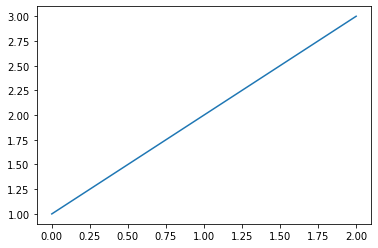

In [37]:
import matplotlib.pyplot as plt

plt.plot([1, 2,3 ])

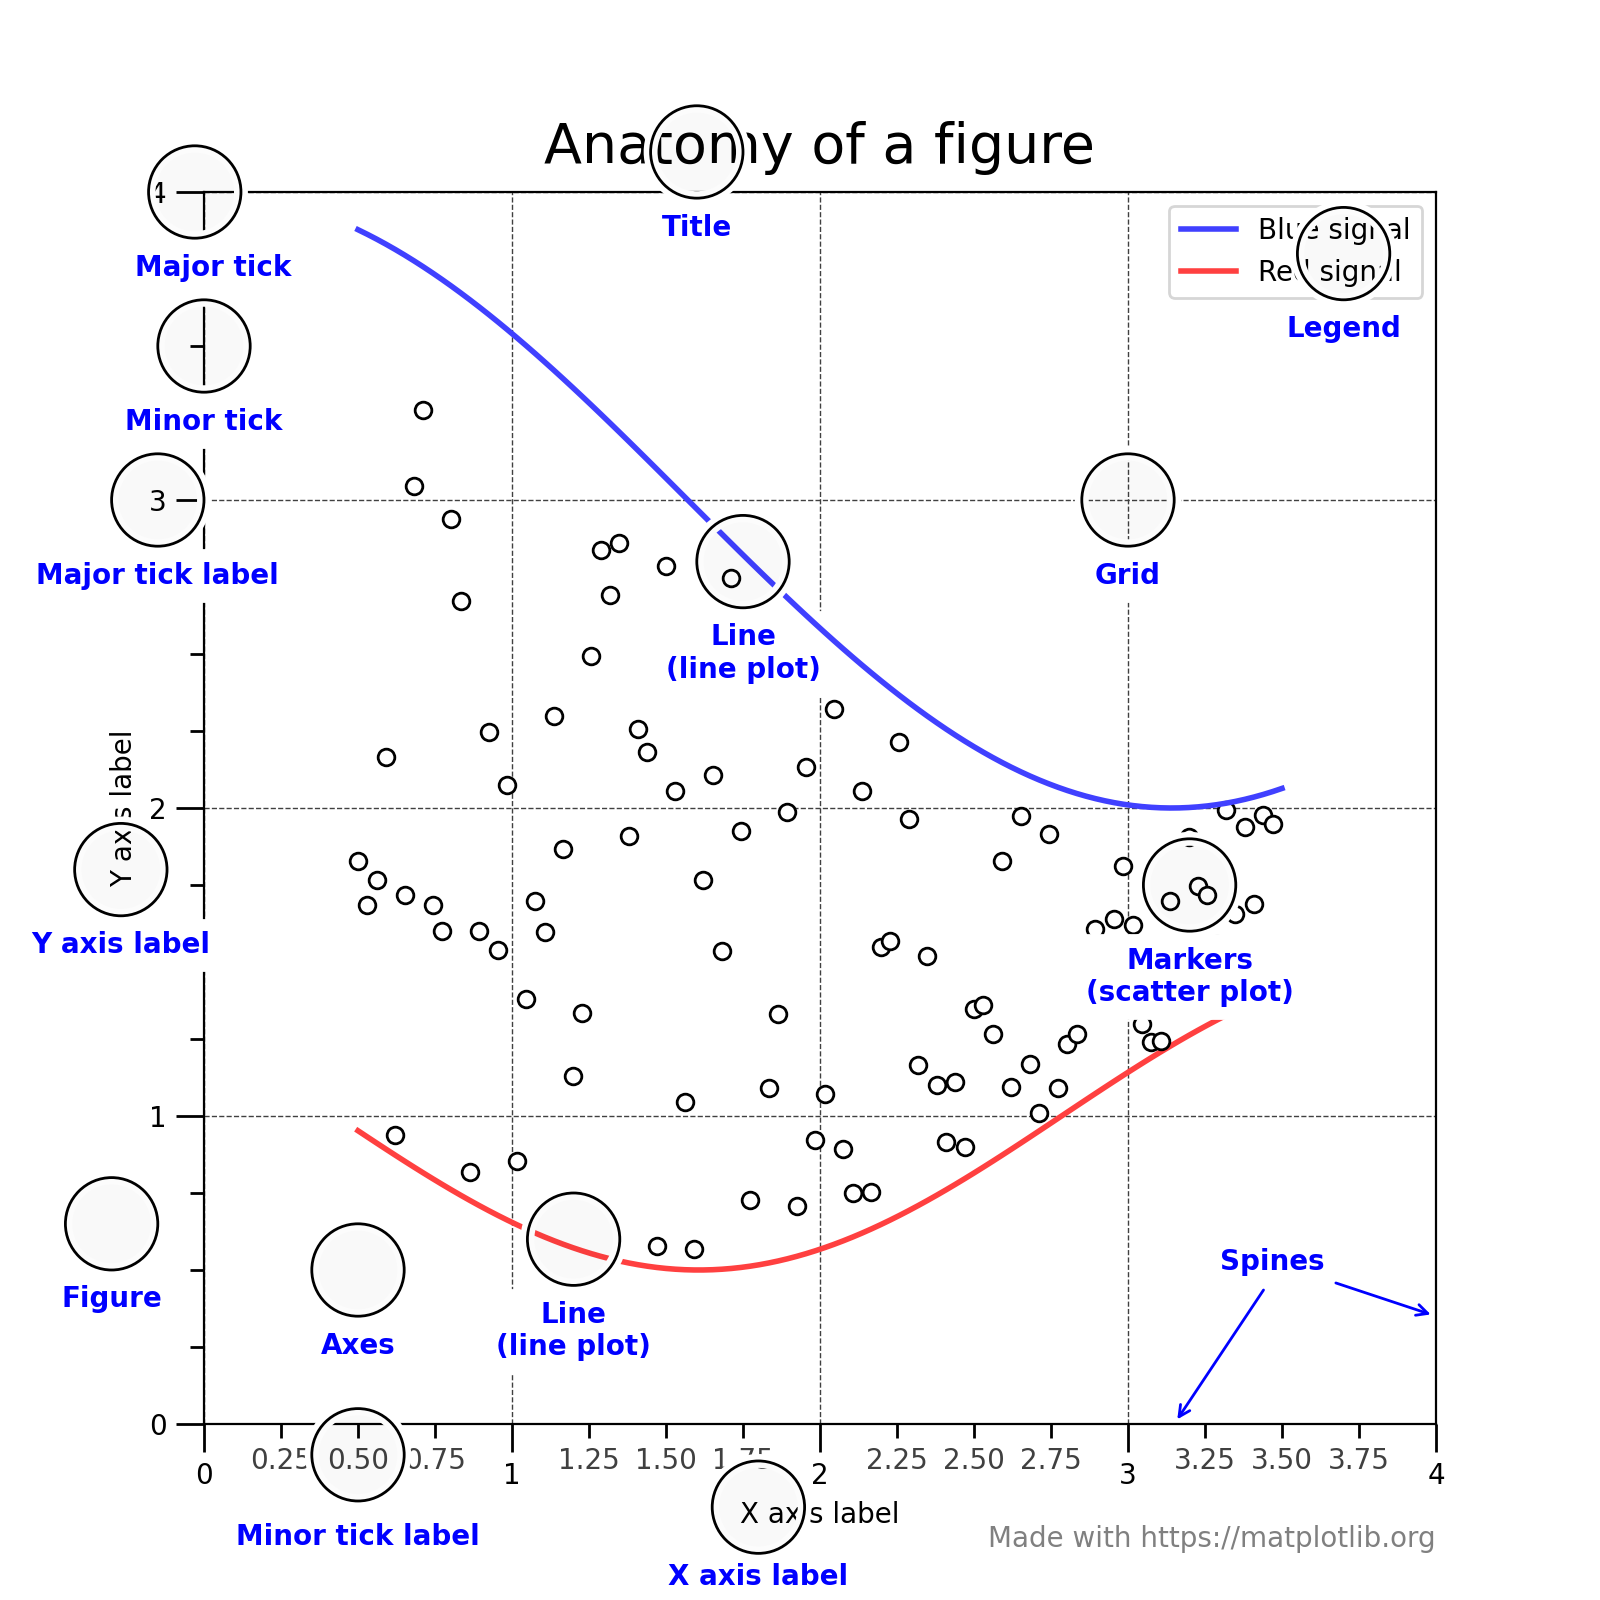

In [6]:
import matplotlib.pyplot as plt
# We've seen this import statement before
from IPython import display
display.Image("https://matplotlib.org/stable/_images/anatomy.png", width=750)

Above is an image from the matplotlib support documents showing the major important features associated with a plot, and their names in blue.

Don't worry about all the detail, it's just here for you as a reference. The important thing to start with is that your plot consists of two primary objects:

> Figure: The canvas where you make your plot <br>
> Axes: The place where your data goes

This might seem like a semantic distinction, however, consider that your figure might have several subplots (say a 2 x 2 grid, for example). In this scenario, you will have one Figure and 4 Axes objects



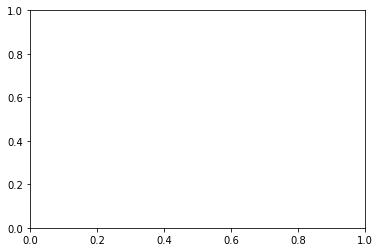

In [38]:
# Creating a single plot:

fig1, ax1 = plt.subplots()

As you can see, this gives us a set of axes to plot on (what you can see is the `Axes` object), which is contained within the `Figure` (which you can't see). 

We've given these two objects variable names: `fig` for the `Figure` and `ax` for the Axes object

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7611b6c790>


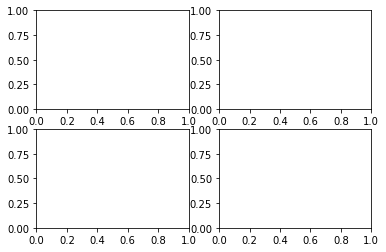

In [39]:
# If we want to have multiple subplots:
fig2, axarr = plt.subplots(nrows=2, ncols=2)
print(axarr)

Here the `fig` variable name still refers to our `Figure`, but it now has 4 `Axes` objects. When we created our first figure, we didn't say how many rows and columns, so matplotlib gave us a single `Axes` object.


### OK. Let's plot something!

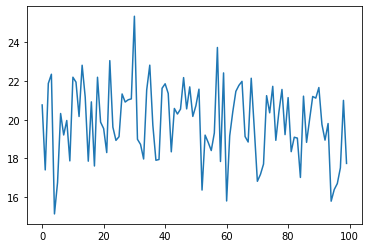

In [40]:
import numpy as np
seed = 42
rng = np.random.default_rng(seed)
y_data = rng.normal(20, 2.5, size=100)

fig3, ax2 = plt.subplots()
ax2.plot(y_data)


You've seen something a lot like this before in the signal processing exercise. This time, we're going to try to understand what's going on with the `plot` function.

`plot` is matplotlib's basic function for creating line plots, as you can see.
If you pass an array (or list, tuple - any iterable with numeric values) as the only argument, Python will assume that this is your y_data, and use the sequence values for the x positions. Note that this plot is equivalent to:

```
x_data = np.arange(y_data.shape[0])
fig, ax = plt.subplots()
ax.plot(x_data, y_data)
```

If we want to plot these data onto one of the subplots from earlier (the 2 x 2 one we created), then we need to access the underlying `Axes` object first:

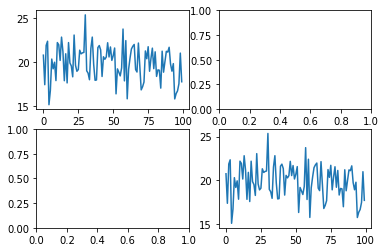

In [42]:
from IPython.core.display import display as _display  # this code is just because we're working in a jupyter notebook here, you won't need it in Spyder.
subplot_1 = axarr[1, 1]
subplot_1.plot(y_data)
_display(fig2)

Or we can plot on all of the subplots, using a loop:

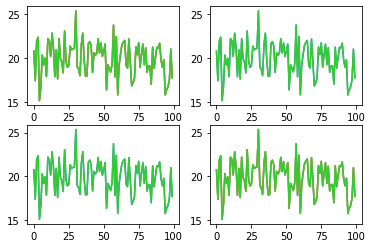

In [45]:
for subplot in axarr.flatten():
    subplot.plot(y_data, color="limegreen")
_display(fig2)

Below is the help for the plot function that you've just been using. There's a lot of information there, but we're just going to focus on some key elements.

* `data` if you have a Pandas DataFrame, you can use this construction

> ```plot('xlabel', 'ylabel', data=obj)```
> * where 'xlabel' and 'ylabel' are the column headers of the x and y_data respectively.

* `linestyle` or `ls` here we can specify whether we want solid, dotted, dashed, etc. lines
* `lineweight` or `lw` defining the thickness of the line
* `marker` allows you to place shapes on the line to assist with visualisation
* `alpha` adjusts the opacity, in case some of your data overlap
* `color` sets the colour of the line

In [44]:
help(subplot.plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the ap

This is an excellent resource if you're using matplotlib or seaborn showing the range of available colours:
[link to matplotlib docs page with named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

### Matplotlib appearance
If you don't like the default matplotlib appearance, then there are a range of built-in styles that will modify the look and feel of your plots in line with some other available tools:

* 'ggplot'
* 'seaborn'
* 'fivethirtyeight'


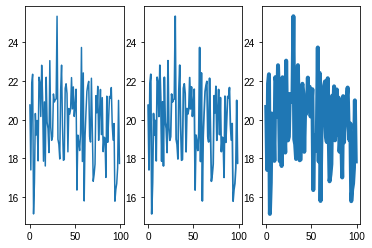

In [46]:
styles = "ggplot", "seaborn", "fivethirtyeight"
fig4, axarr4 = plt.subplots(1, 3)
for ax4, style in zip(axarr4, styles):
    plt.style.use(style)
    ax4.plot(y_data)

### But what about other plots?

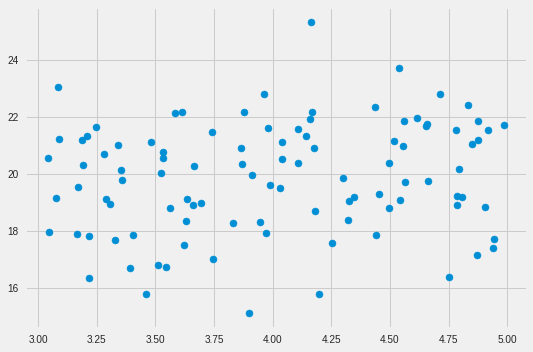

In [47]:
fig5, ax5 = plt.subplots()
x_data = rng.uniform(3, 5, size=y_data.shape[0])
ax5.scatter(x_data, y_data)

We can also combine plots to add a regression line, for example

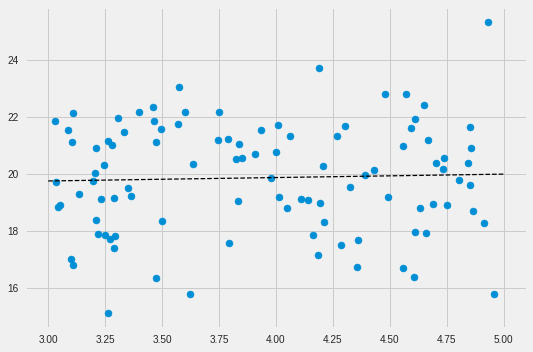

In [48]:
from scipy.stats import linregress

fig5, ax5 = plt.subplots()
x_data = rng.uniform(3, 5, size=y_data.shape[0])
ax5.scatter(x_data, y_data)
regression = linregress(x_data, y_data)
model_x_values = np.linspace(3, 5, 200)
model_y_values = (regression.slope * model_x_values) + regression.intercept
ax5.plot(model_x_values, model_y_values, lw=1.25, color="k", ls="--")

Read in the 'plotting.xlsx' file as a Pandas DataFrame, and plot as a line graph
1. with one line per `Axes`
2. With 2 lines on one `Axes`
3. Make a `barplot` of the mean values
3. Make a `boxplot` of these data
4. Try to make a categorical scatter plot (i.e. a bar plot without the bars)

AxesSubplot(0.08,0.07;0.87x0.81)
Figure(576x396)


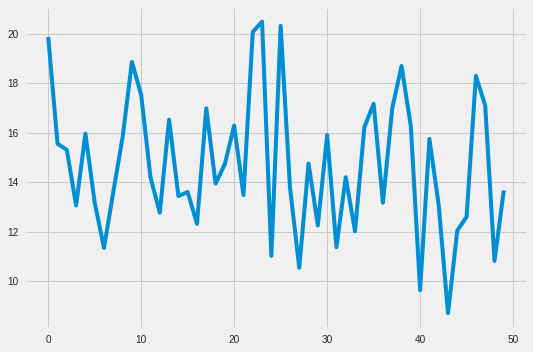

In [61]:
import pandas as pd
df = pd.read_excel("plotting.xlsx")

# fig, ax_df = plt.subplots()
# ax_df.plot(df)
# ax_df.set_xlabel("This is the x-axis label")
# for ax, column_header in zip(axarr_df, df):
#     ax.plot(df[column_header])
# ax.set_ylim(0)

fig = plt.plot(df["M"])
ax = plt.gca()
print(ax)
f = plt.gcf()
print(f)

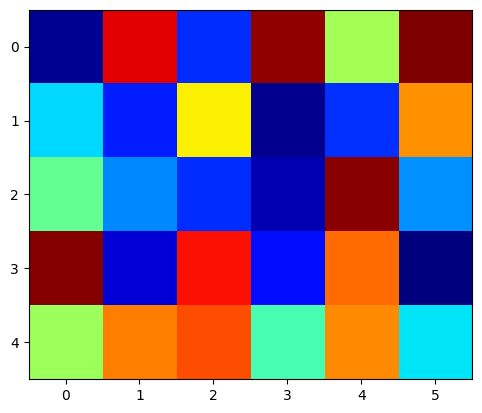

In [67]:
import numpy as np
matplotlib.style.use("default")

rng = np.random.default_rng(10)
random_arr = rng.uniform(0, 1, size=(5, 6))

fig, ax = plt.subplots()
ax.imshow(random_arr, cmap="jet_r")

## Seaborn Swarmplot
Seaborn is built on top of matplotlib, so anything that you can do in Seaborn, you can also do in matplotlib. However, as we spoke about last time, it's often worth checking whether what you want to do has already been done by someone else.

A good example here is the `swarmplot`. This allows us to easily plot categorical scatter data, such as in the plotting.xlsx file. Seaborn will also take care of x- and y-axis labelling

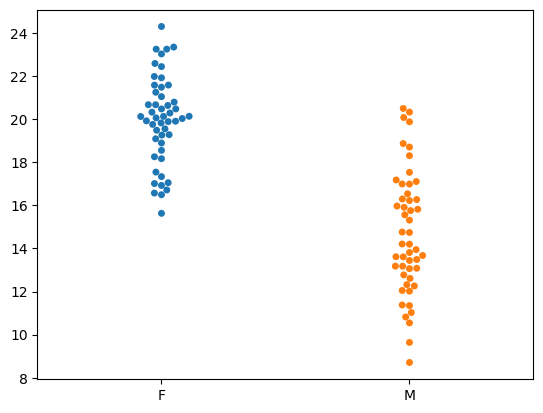

In [64]:
import seaborn as sns
import pandas as pd
df = pd.read_excel("plotting.xlsx")
sns.swarmplot(data=df)

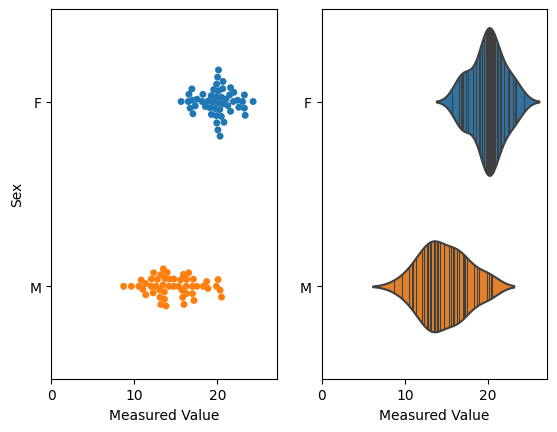

In [68]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True)
ax0 = sns.swarmplot(data=df, orient="h", ax=ax0)
ax1 = sns.violinplot(data=df, orient="h", inner="stick", ax=ax1)
ax0.set_xlim(0)
ax0.set_ylabel("Sex")
for ax in (ax0, ax1):
    ax.set_xlabel("Measured Value")
    

### Passing arguments to functions
A Python feature that we haven't talked about is the ability to pass arguments to a function (or method) using a dictionary. This can make it easier to organise our plot formatting. Taking the previous example of the violin plot

In [ ]:
fig2, (ax2, ax3) = plt.subplots(1, 2, sharex=True)
violin_parameters = {"orient": "h", "inner": "stick"}
ax2 = sns.violinplot(data=df, ax=ax2, **violin_parameters)

In [71]:
def example_function(arg1, arg2, arg3):
    return (arg1 + arg2) * arg3

arg_dict = {"arg1": 2, "arg2": 3, "arg3": 1}

print(example_function(**arg_dict))

5


This approach can be applied to any function or method, not just plotting, but is particularly useful in this context if you have multiple subplots and different plot formats in each.

In [76]:
df_method = getattr(df, "mean")
print(df_method)

<bound method DataFrame.mean of             F          M
0   20.125813  19.870629
1   21.971306  15.557373
2   23.334883  15.309199
3   18.159153  13.061376
4   19.896931  15.963933
5   15.626515  13.177133
6   21.475654  11.347910
7   16.565072  13.614906
8   20.022030  15.815050
9   20.662522  18.861697
10  22.574532  17.525505
11  20.115850  14.194523
12  20.627043  12.770833
13  20.466110  16.530118
14  23.239419  13.440116
15  20.277758  13.606536
16  23.239267  12.318796
17  19.272116  16.987835
18  19.879233  13.943474
19  21.037333  14.736882
20  19.479563  16.291518
21  19.816858  13.484155
22  16.488341  20.068929
23  19.749430  20.488593
24  19.544142  11.025867
25  17.046415  20.320124
26  20.051989  13.809371
27  18.546164  10.545840
28  24.290067  14.756934
29  20.120154  12.257984
30  21.573069  15.905093
31  17.006694  11.377193
32  16.709820  14.203338
33  17.328918  12.018954
34  19.914475  16.219519
35  16.919360  17.173156
36  20.659821  13.175038
37  20.467797  16.

(0.0, 27.13301590371256)

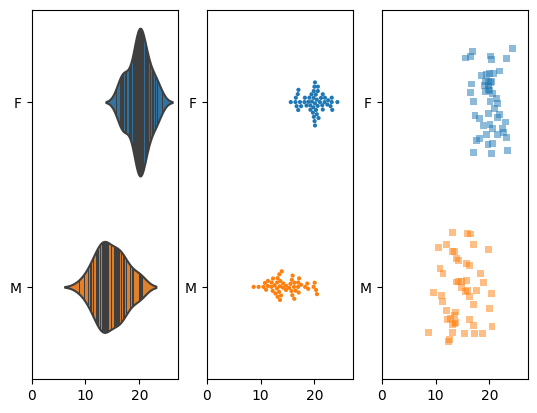

In [77]:
fig3, axarr3 = plt.subplots(1, 3, sharex=True)
format_dict = {"violinplot": {"orient": "h", "inner": "stick"},
               "swarmplot": {"size": 3, "orient": "h"},
               "stripplot": {"marker": "s", "alpha": 0.5, "jitter": 0.3, "orient": "h"}}
for ax, (plot_type, plot_dict) in zip(axarr3, format_dict.items()):
    plot_method = getattr(sns, plot_type)
    ax = plot_method(data=df, ax=ax, **plot_dict)
ax.set_xlim(0)

In [82]:
count = 0
i1 = (1, 2, 3)
i2 = ("A", "B", "C", "D")

for i, j in zip(i2, i1):
    print(i, j)

# for i in i1:
#     j = i2[count]
#     count += 1
#     print(i, j)


A 1
B 2
C 3


The `Figure` method `delaxes` allows us to remove `Axes` objects, for example if we have more than we need:

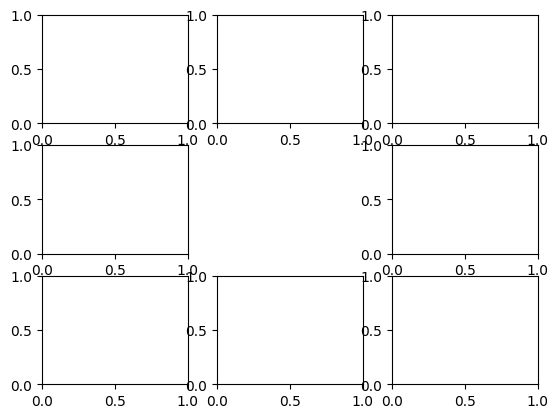

In [78]:
fig6, axarr6 = plt.subplots(3, 3)
fig6.delaxes(axarr6[1, 1])

More complex layouts are possible, but we won't go into too much detail here. The "old" way of doing it is to use `GridSpec` to specify the layout you want. It's a little bit involved, but with a bit of practice becomes fairly intuitive. There is currently a method that is in active development (which means it might change, or be removed entirely without warning, so you shouldn't rely heavily on it at this point). This is the `subplot_mosaic` `Figure` method.

In [83]:
mosaic_figure = plt.figure()
mosaic = """
    AB
    CD
    """
ax_dict = mosaic_figure.subplot_mosaic(mosaic)
print(ax_dict)

AttributeError: ignored

<Figure size 640x480 with 0 Axes>

Why doesn't this work? The `subplot_mosaic` method was implemented in matplotlib v. 3.3, and this Jupyter notebook uses an earlier version. Most high-profile Python packages (pandas, numpy, matplotlib, etc.) have a `__version__` attribute. You'll need this information for your publications and to work with other people on code, if that's where your research takes you.

In [84]:
import matplotlib   
print(matplotlib.__version__)

3.2.2


In [ ]:
import numpy as np
import pandas as pd
import sys
print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Python version: ", sys.version)